In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import healpy as hp
from filter_stars import remove_stars

In [2]:
#Healpix definitions
NSIDE=64
npix = hp.nside2npix(NSIDE)
total_degrees_in_sky = 4.*np.pi*(180./np.pi)**2
area_per_pixel = total_degrees_in_sky/(1.*npix)

In [3]:
def radec_to_sph(ra,dc):
    
    theta = (90.-dc)*np.pi/180.
    phi   = ra*np.pi/180.
    return theta, phi

In [4]:
def get_h(tab, ra_col, dec_col):
    
    #Convert to ra/dec
    theta, phi = radec_to_sph(tab[ra_col],tab[dec_col])
    
    #set up the healpix grid.
    n = hp.ang2pix(NSIDE, theta, phi)
    
    #Load up the healpix array and display it. 
    h = np.histogram(n,hp.nside2npix(NSIDE),
                     range=(0,hp.nside2npix(NSIDE)-1))[0]
    h = h.astype(np.float64)
    
    return h


In [5]:
#Read the full F-test and BIC AGN candidate catalogs. 
Fcat = Table.read("../Victoria_v1.1_SED_catalogs/Master_Catalog_F_test_AGN_full_photometry.fits")
Bcat = Table.read("../Victoria_v1.1_SED_catalogs/Master_Catalog_BIC_AGN_nb_le_6_full_photometry.fits")

In [6]:
Fcat_wide = Fcat[Fcat['mag_auto_r']<21.5]
Fcat_wide = remove_stars(Fcat_wide)
h_F_wide = get_h(Fcat_wide,'ra','dec')

In [7]:
Bcat_wide = Bcat[Bcat['mag_auto_r']<21.5]
Bcat_wide = remove_stars(Bcat_wide)
h_B_wide = get_h(Bcat_wide,'ra','dec')

In [8]:
#Get the median densities. 
median_dens_F_wide = np.median(h_F_wide[h_F_wide>0])/area_per_pixel
print("Median density of F-test sources in wide survey is: {:.1f} per sq. deg.".format(median_dens_F_wide))

Median density of F-test sources in wide survey is: 78.6 per sq. deg.


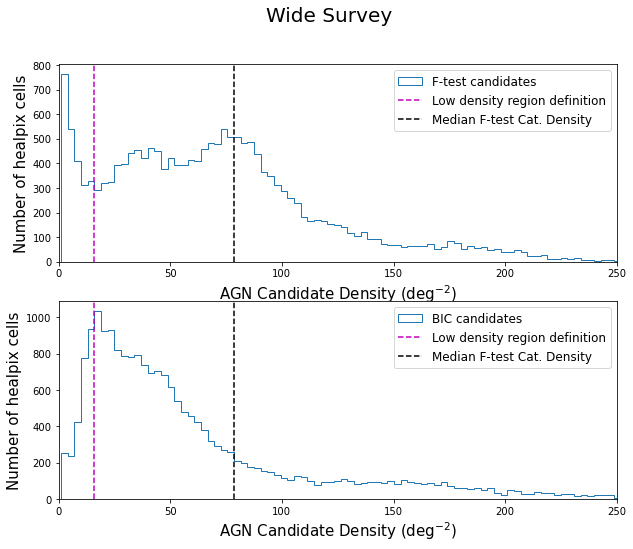

In [9]:
fig, axs = plt.subplots(2, figsize=(10,8))

_, bins, _ = axs[0].hist(h_F_wide[h_F_wide>0], bins=200, histtype='step', label='F-test candidates')
axs[0].set_xlim([0,250])
axs[0].set_ylim(axs[0].get_ylim())
axs[0].plot([0.2*median_dens_F_wide]*2, axs[0].get_ylim(),'m--', label='Low density region definition')
axs[0].plot([median_dens_F_wide]*2    , axs[0].get_ylim(),'k--', label='Median F-test Cat. Density')
axs[0].legend(fontsize=12)
axs[0].set_xlabel(r"AGN Candidate Density (deg$^{-2}$)", fontsize=15)
axs[0].set_ylabel("Number of healpix cells", fontsize=15)

axs[1].hist(h_B_wide[h_B_wide>0], bins=bins, histtype='step', label='BIC candidates')
axs[1].set_xlim([0,250])
axs[1].set_ylim(axs[1].get_ylim())
axs[1].plot([0.2*median_dens_F_wide]*2, axs[1].get_ylim(),'m--', label='Low density region definition')
axs[1].plot([median_dens_F_wide]*2    , axs[1].get_ylim(),'k--', label='Median F-test Cat. Density')
axs[1].legend(fontsize=12)
axs[1].set_xlabel(r"AGN Candidate Density (deg$^{-2}$)", fontsize=15)
axs[1].set_ylabel("Number of healpix cells", fontsize=15)

fig.suptitle("Wide Survey", fontsize=20)

plt.show()

In [10]:
Fcat_med = Fcat[Fcat['mag_auto_r']<22.5]
Bcat_med = Bcat[Bcat['mag_auto_r']<22.5]

In [15]:
ra_min = 157.
ra_max = 225.
dec_min = -4.
dec_max =  4.

ra_F  = Fcat_med['ra']
dec_F = Fcat_med['dec']
ra_B  = Bcat_med['ra']
dec_B = Bcat_med['dec']

Fcat_med = Fcat_med[(ra_F>ra_min) & (dec_F>dec_min) & (ra_F<ra_max) & (dec_F<dec_max)]
Bcat_med = Bcat_med[(ra_B>ra_min) & (dec_B>dec_min) & (ra_B<ra_max) & (dec_B<dec_max)]

In [16]:
Fcat_med = remove_stars(Fcat_med)
h_F_med = get_h(Fcat_med,'ra','dec')

Bcat_med = remove_stars(Bcat_med)
h_B_med = get_h(Bcat_med,'ra','dec')

In [17]:
#Get the median densities. 
median_dens_F_med = np.median(h_F_med[h_F_med>0])/area_per_pixel
print("Median density of F-test sources in medium survey is: {:.1f} per sq. deg.".format(median_dens_F_med))

Median density of F-test sources in medium survey is: 432.5 per sq. deg.


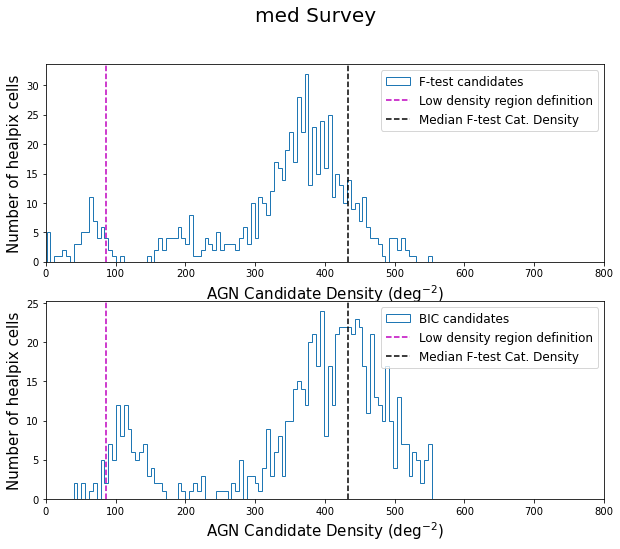

In [19]:
fig, axs = plt.subplots(2, figsize=(10,8))

_, bins, _ = axs[0].hist(h_F_med[h_F_med>0], bins=100, histtype='step', label='F-test candidates')
axs[0].set_xlim([0,800])
axs[0].set_ylim(axs[0].get_ylim())
axs[0].plot([0.2*median_dens_F_med]*2, axs[0].get_ylim(),'m--', label='Low density region definition')
axs[0].plot([median_dens_F_med]*2    , axs[0].get_ylim(),'k--', label='Median F-test Cat. Density')
axs[0].legend(fontsize=12)
axs[0].set_xlabel(r"AGN Candidate Density (deg$^{-2}$)", fontsize=15)
axs[0].set_ylabel("Number of healpix cells", fontsize=15)

axs[1].hist(h_B_med[h_B_med>0], bins=bins, histtype='step', label='BIC candidates')
axs[1].set_xlim([0,800])
axs[1].set_ylim(axs[1].get_ylim())
axs[1].plot([0.2*median_dens_F_med]*2, axs[1].get_ylim(),'m--', label='Low density region definition')
axs[1].plot([median_dens_F_med]*2    , axs[1].get_ylim(),'k--', label='Median F-test Cat. Density')
axs[1].legend(fontsize=12)
axs[1].set_xlabel(r"AGN Candidate Density (deg$^{-2}$)", fontsize=15)
axs[1].set_ylabel("Number of healpix cells", fontsize=15)

fig.suptitle("med Survey", fontsize=20)

plt.show()